In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

In [2]:
class EpsilonGreedyBinaryBandit:
    def __init__(self, epsilon: float = 0.1):
        
        self.epsilon = epsilon
        self.num_arms = 2
        self.Q = np.zeros(self.num_arms)  
        self.N = np.zeros(self.num_arms)  
        
    def select_action(self) -> int:

        if np.random.random() < self.epsilon:
            return np.random.randint(self.num_arms)
        
        else:
            return np.random.choice(np.where(self.Q == self.Q.max())[0])
    
    def update(self, action: int, reward: float):
        
        self.N[action] += 1
        self.Q[action] += (1.0 / self.N[action]) * (reward - self.Q[action])

In [3]:
def run_binary_bandit(num_iterations: int) -> Tuple[float, List[int], List[float]]:
   
    bandit = EpsilonGreedyBinaryBandit()
    total_reward = 0
    rewards = []
    
    for _ in range(num_iterations):
        action = bandit.select_action()
        
        reward = np.random.binomial(1, 0.5) 
        
        bandit.update(action, reward)
        total_reward += reward
        rewards.append(reward)
    
    return total_reward, bandit.N.tolist(), rewards

In [4]:
class NonStationaryBandit:
    def __init__(self, n_arms: int = 10):
       
        self.n_arms = n_arms
        self.q_values = np.zeros(n_arms)
        
    def get_reward(self, action: int) -> float:
        
        self.q_values += np.random.normal(0, 0.01, self.n_arms)
        
        true_value = self.q_values[action]
        return np.random.normal(true_value, 1.0)

In [5]:
def test_nonstationary_bandit(num_iterations: int):
   
    bandit = NonStationaryBandit()
    rewards = []
    q_values_history = []
    
    for _ in range(num_iterations):
        action = np.random.randint(10)  # Random action selection
        reward = bandit.get_reward(action)
        rewards.append(reward)
        q_values_history.append(bandit.q_values.copy())
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(rewards)
    plt.xlabel('Time step')
    plt.ylabel('Reward')
    plt.title('Rewards Over Time')
    
    plt.subplot(1, 2, 2)
    q_values_history = np.array(q_values_history)
    
    for arm in range(10):
        plt.plot(q_values_history[:, arm], label=f'Arm {arm}')

    plt.xlabel('Time step')
    plt.ylabel('True value')
    plt.title('True Values Evolution')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Total reward: 526
Action counts: [73.0, 927.0]
Average reward: 0.526


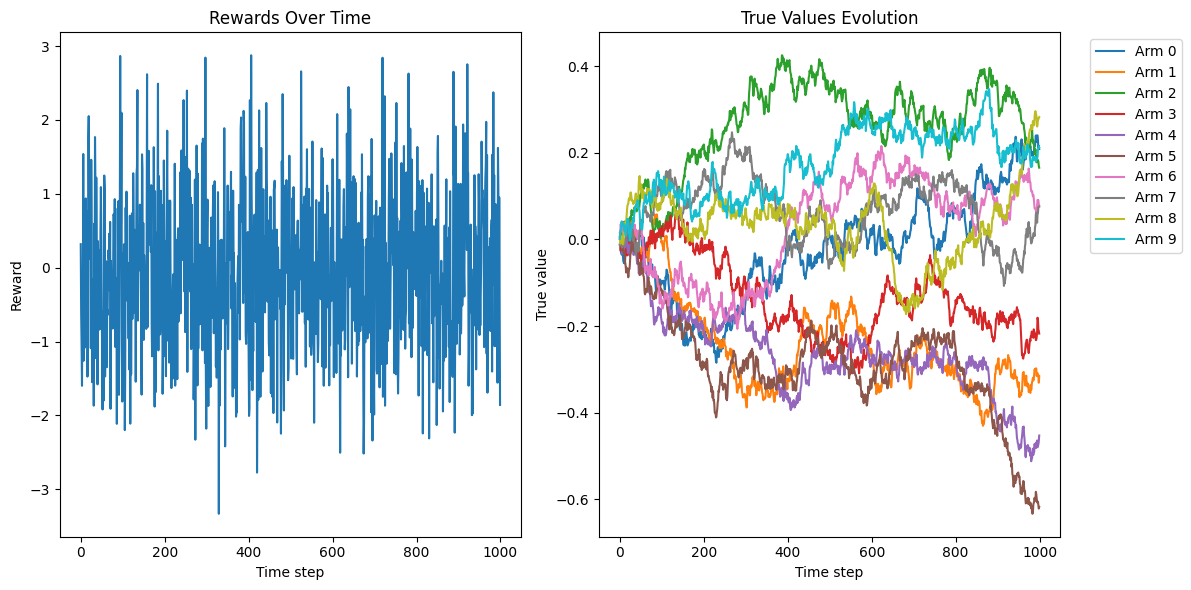

In [6]:
if __name__ == "__main__":
    num_iterations = 1000
    total_reward, action_counts, rewards = run_binary_bandit(num_iterations)
    print(f"Total reward: {total_reward}")
    print(f"Action counts: {action_counts}")
    print(f"Average reward: {total_reward / num_iterations:.3f}")
    
    test_nonstationary_bandit(1000)